In [74]:
#Importing required libraries
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
import calendar

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing step
from sklearn.preprocessing import LabelEncoder

#splitting data
from sklearn.model_selection import train_test_split

#Machine Learning model Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor

#performance metrics for classification model

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import warnings
warnings.simplefilter("ignore")

In [10]:
#Load the training data
train = pd.read_csv(r'C:\Users\intel\Downloads\Machine Learning\Mid Project 1\Dataset\train.csv')
train_label = pd.read_csv(r'C:\Users\intel\Downloads\Machine Learning\Mid Project 1\Dataset\train_label.csv', header =None)
test = pd.read_csv(r'C:\Users\intel\Downloads\Machine Learning\Mid Project 1\Dataset\test.csv')
test_label = pd.read_csv(r'C:\Users\intel\Downloads\Machine Learning\Mid Project 1\Dataset\test_label.csv', header =None)

In [11]:
train['Total_booking']=train_label[0]

In [12]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92


In [13]:
# Creating new columns from the DateTime columns
train['Date']= train.datetime.apply(lambda x : x.split()[0])
train['Hour']= train.datetime.apply(lambda x : x.split()[1].split(':')[0])
train['Weekday']= train.Date.apply(lambda dataString : calendar.day_name[datetime.strptime(dataString,"%m/%d/%Y").weekday()])
train['month']= train.Date.apply(lambda dataString : calendar.month_name[datetime.strptime(dataString,"%m/%d/%Y").month])

test['Date']= test.datetime.apply(lambda x : x.split()[0])
test['Hour']= test.datetime.apply(lambda x : x.split()[1].split(':')[0])
test['Weekday']= test.Date.apply(lambda dataString : calendar.day_name[datetime.strptime(dataString,"%m/%d/%Y").weekday()])
test['month']= test.Date.apply(lambda dataString : calendar.month_name[datetime.strptime(dataString,"%m/%d/%Y").month])


In [14]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Date,Hour,Weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4,Wednesday,September
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9,Thursday,January
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,1/16/2012,6,Monday,January
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,11/10/2011,1,Thursday,November
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,4/12/2011,3,Tuesday,April
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,11/7/2012,1,Wednesday,November


# Feature Enginnering and Visualization

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   Total_booking  8708 non-null   int64  
 10  Date           8708 non-null   object 
 11  Hour           8708 non-null   object 
 12  Weekday        8708 non-null   object 
 13  month          8708 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 952.6+ KB


In [16]:
#Checking Unique value in Hour column
train.Hour.unique()

array(['19', '4', '9', '16', '13', '17', '18', '15', '20', '14', '23',
       '11', '8', '1', '10', '22', '7', '2', '12', '0', '3', '5', '6',
       '21'], dtype=object)

In [19]:
train.shape

(8708, 14)

In [20]:
#Checking for null values
train.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
Date             0
Hour             0
Weekday          0
month            0
dtype: int64

In [21]:
# Checking for numerical values in columns
columns = train.columns

num_col= [col for col in train.columns if train[col].dtypes!='O']
num_col

['holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'Total_booking']

In [22]:
# Checking for Categorical features in columns
columns = train.columns

cat_col= [col for col in train.columns if train[col].dtypes=='O']
cat_col

['datetime', 'season', 'weather', 'Date', 'Hour', 'Weekday', 'month']

In [23]:
# Checking for Categorical features unique values in columns
for col in cat_col:
    print(col)
    print(train[col].unique())
    print("-----------")

datetime
['5/2/2012 19:00' '9/5/2012 4:00' '1/13/2011 9:00' ... '4/12/2011 3:00'
 '11/7/2012 1:00' '1/10/2011 10:00']
-----------
season
['Summer' 'Fall' 'Spring' 'Winter']
-----------
weather
[' Clear + Few clouds' ' Light Snow, Light Rain' ' Mist + Cloudy '
 ' Heavy Rain + Thunderstorm ']
-----------
Date
['5/2/2012' '9/5/2012' '1/13/2011' '11/18/2011' '9/13/2011' '8/17/2012'
 '10/6/2012' '9/10/2012' '7/14/2012' '2/6/2011' '1/17/2012' '3/13/2011'
 '6/14/2012' '2/9/2012' '9/19/2011' '2/18/2011' '10/9/2011' '6/12/2012'
 '8/2/2011' '9/12/2011' '5/18/2011' '8/7/2012' '8/14/2011' '12/17/2011'
 '12/3/2012' '4/13/2011' '6/4/2012' '7/10/2012' '11/5/2012' '7/12/2011'
 '5/6/2012' '12/13/2011' '7/5/2011' '11/2/2011' '5/4/2011' '7/11/2011'
 '12/17/2012' '6/6/2011' '11/3/2012' '2/7/2011' '5/10/2012' '11/19/2011'
 '12/10/2012' '6/13/2011' '9/11/2012' '1/1/2011' '1/6/2011' '7/16/2012'
 '12/19/2012' '6/5/2012' '5/15/2012' '6/16/2012' '1/10/2011' '3/14/2012'
 '9/19/2012' '7/16/2011' '12/15/2012' '6/1

In [ ]:
# Using Label Encoder to converting categorical features to Numerical values

In [24]:
le = LabelEncoder()
for i in train.columns:
    if train[i].dtype=='object':
        train[i]=le.fit_transform(train[i])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Date,Hour,Weekday,month
0,5510,2,0,1,0,22.14,25.760,77,16.9979,504,289,11,6,8
1,8549,0,0,1,0,28.70,33.335,79,19.0012,5,447,18,6,11
2,153,1,0,1,0,5.74,6.060,50,22.0028,139,8,23,4,4
3,1763,3,0,1,0,13.94,16.665,29,8.9981,209,94,8,0,9
4,8134,0,0,1,0,30.34,33.335,51,19.0012,184,426,5,5,11


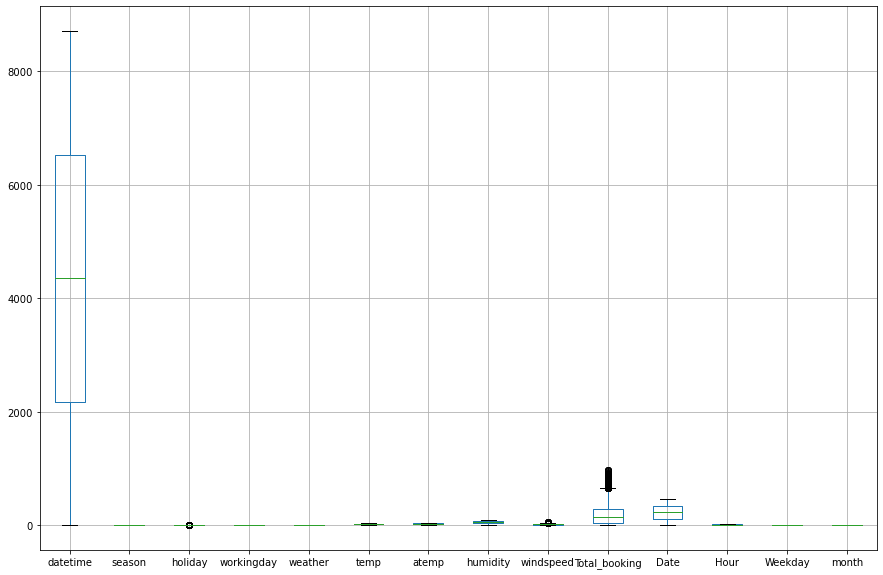

In [25]:
#Check outlier using box plot
plt.figure(figsize=(15,10))
train.boxplot()
plt.show()

In [26]:
# Check for Outlier using IQR method
# Calculate the IQR
Q1 = train['Total_booking'].quantile(0.25)
Q3 = train['Total_booking'].quantile(0.75)
IQR = Q3 - Q1
train['Total_booking'] = np.clip(train['Total_booking'], Q1-1.5*IQR, Q3+1.5*IQR)

print(IQR)

243.0


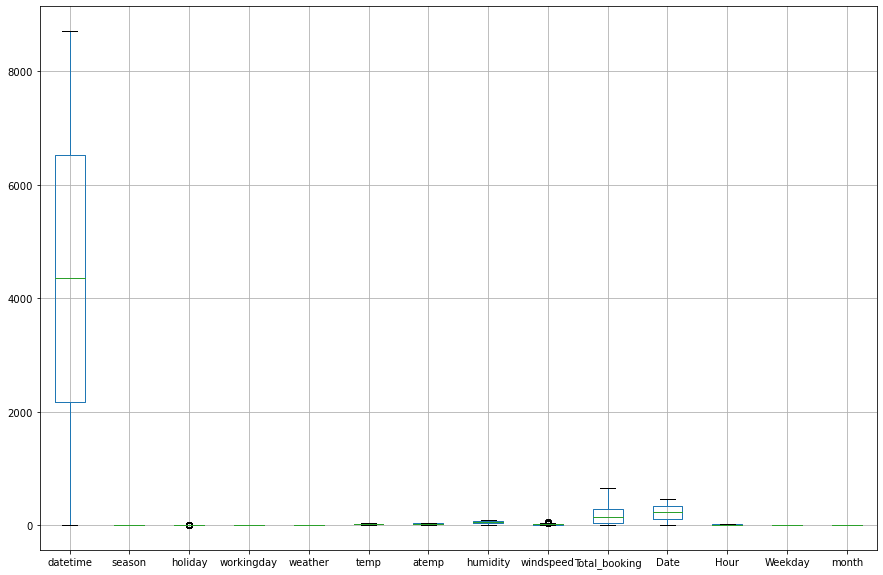

In [27]:
plt.figure(figsize=(15,10))
train.boxplot()
plt.show()

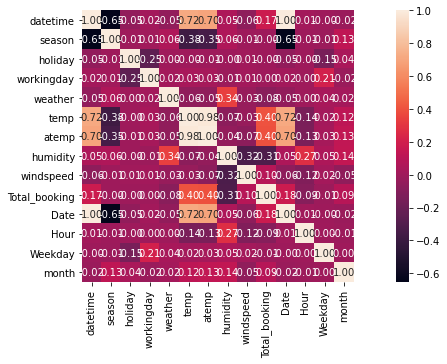

In [28]:
# Checking Correlation between diffrent features
corrmat = train.corr()
fig = plt.figure(figsize = (15,5))

sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10})
plt.show()

In [29]:
corrmat

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Date,Hour,Weekday,month
datetime,1.000000,-0.653290,-0.052481,0.016295,-0.046490,0.716943,0.697263,0.054751,-0.061821,0.174355,0.999991,0.012758,-0.002004,-0.017271
season,-0.653290,1.000000,-0.007236,0.005784,0.060624,-0.380153,-0.346962,0.061593,-0.006530,-0.004484,-0.651929,-0.006703,-0.008154,0.127627
holiday,-0.052481,-0.007236,1.000000,-0.249755,0.004602,-0.000165,-0.005526,-0.004567,0.008075,-0.002029,-0.052430,-0.001372,-0.147763,0.038515
workingday,0.016295,0.005784,-0.249755,1.000000,0.015095,0.032189,0.026168,-0.009282,0.013035,0.003846,0.016392,0.002966,0.207716,-0.017813
weather,-0.046490,0.060624,0.004602,0.015095,1.000000,-0.058179,-0.053863,0.336430,-0.028814,-0.082830,-0.046482,0.003498,0.036442,0.022890
temp,0.716943,-0.380153,-0.000165,0.032189,-0.058179,1.000000,0.984035,-0.066419,-0.027824,0.402210,0.717810,-0.139920,0.022367,0.118058
atemp,0.697263,-0.346962,-0.005526,0.026168,-0.053863,0.984035,1.000000,-0.044206,-0.068911,0.397661,0.698168,-0.134873,0.029178,0.129037
humidity,0.054751,0.061593,-0.004567,-0.009282,0.336430,-0.066419,-0.044206,1.000000,-0.320346,-0.313648,0.054090,0.272831,0.051013,0.137240
windspeed,-0.061821,-0.006530,0.008075,0.013035,-0.028814,-0.027824,-0.068911,-0.320346,1.000000,0.095601,-0.061455,-0.116391,0.018699,-0.054253
Total_booking,0.174355,-0.004484,-0.002029,0.003846,-0.082830,0.402210,0.397661,-0.313648,0.095601,1.000000,0.175172,-0.094131,-0.012877,0.094118


In [30]:
from scipy.stats import pearsonr
var = ['datetime','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','Date','Hour','Weekday','month']
for col in var:
    coef, pval = pearsonr(train[col], train.Total_booking)
    print('Correlation b/w Total booking and %s - coef: %.2f, pval: %f' %(col, coef, pval))

Correlation b/w Total booking and datetime - coef: 0.17, pval: 0.000000
Correlation b/w Total booking and season - coef: -0.00, pval: 0.675664
Correlation b/w Total booking and holiday - coef: -0.00, pval: 0.849872
Correlation b/w Total booking and workingday - coef: 0.00, pval: 0.719678
Correlation b/w Total booking and weather - coef: -0.08, pval: 0.000000
Correlation b/w Total booking and temp - coef: 0.40, pval: 0.000000
Correlation b/w Total booking and atemp - coef: 0.40, pval: 0.000000
Correlation b/w Total booking and humidity - coef: -0.31, pval: 0.000000
Correlation b/w Total booking and windspeed - coef: 0.10, pval: 0.000000
Correlation b/w Total booking and Date - coef: 0.18, pval: 0.000000
Correlation b/w Total booking and Hour - coef: -0.09, pval: 0.000000
Correlation b/w Total booking and Weekday - coef: -0.01, pval: 0.229549
Correlation b/w Total booking and month - coef: 0.09, pval: 0.000000


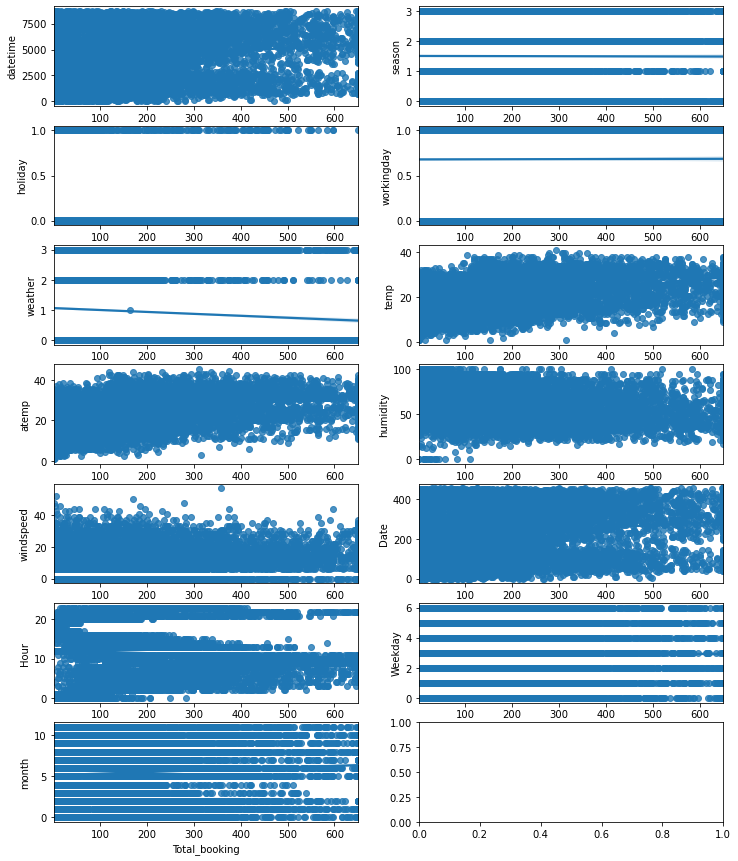

In [33]:
# Visualizing Total_booking Vs other features to generate insights
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(12,15))
i = 0
j = 0
for var in ['datetime','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','Date','Hour','Weekday','month']:
    sns.regplot(x='Total_booking', y=var, data =train, ax= axs[i][j])
    j +=1
    if j>1:
        i += 1
        j =0

count   8708.00
mean     190.15
std      172.83
min        1.00
25%       43.00
50%      148.00
75%      286.00
max      650.50
Name: Total_booking, dtype: float64


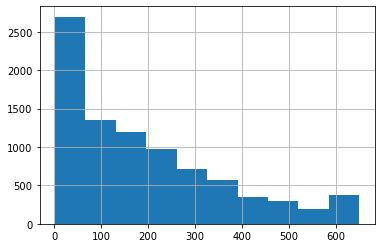

In [34]:
pd.options.display.float_format = '{:.2f}'.format
print(train.Total_booking.describe())
train.Total_booking.hist()
plt.show()

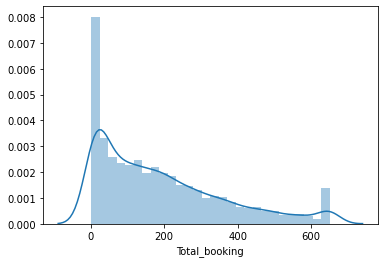

In [35]:
sns.distplot(train.Total_booking);

In [ ]:
# Total booking data is skewed

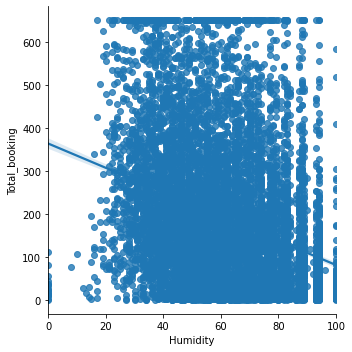

In [36]:
sns.lmplot(x="humidity", y="Total_booking",data=train,fit_reg=True,)
plt.xlabel("Humidity")
plt.show()

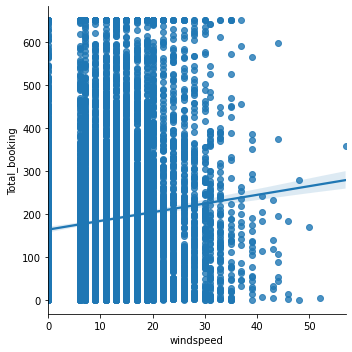

In [37]:
sns.lmplot(x="windspeed", y="Total_booking",data=train,fit_reg=True,)
plt.xlabel("windspeed")
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x1704ab46c70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1704ab46c70>)

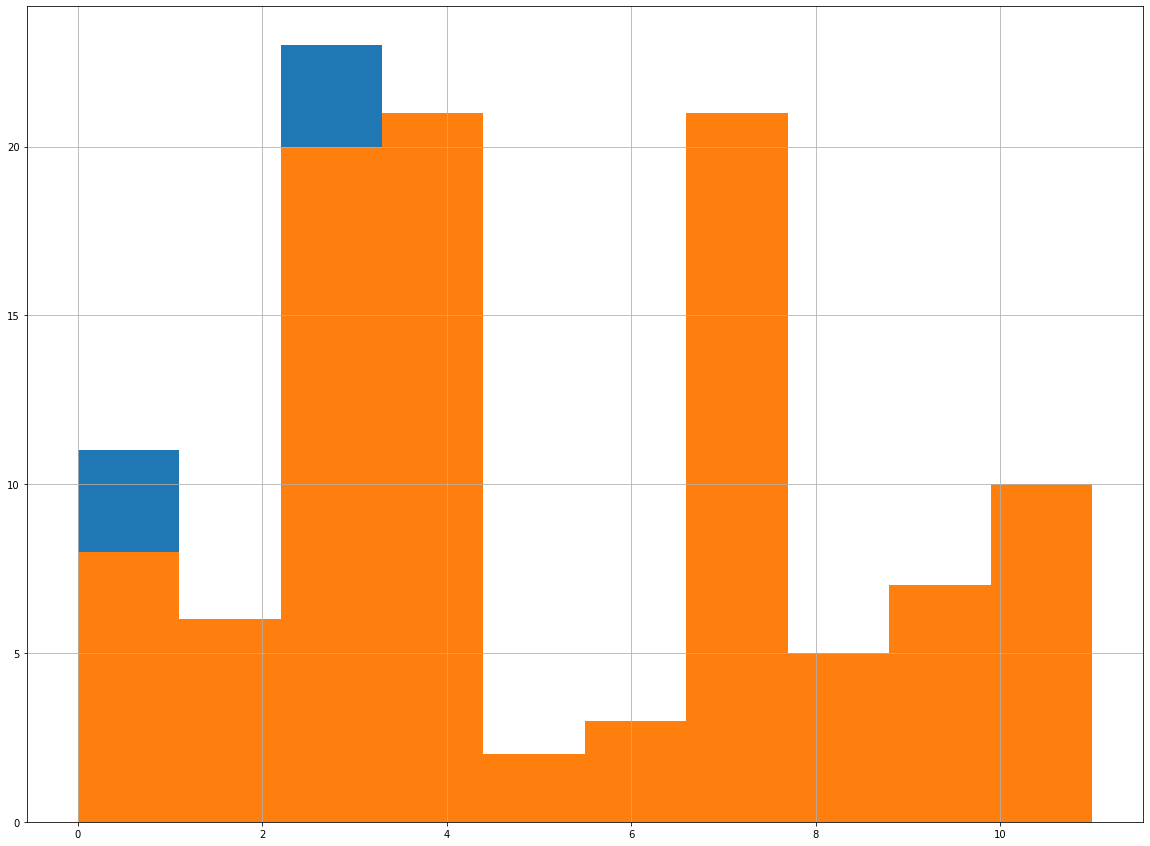

In [38]:
#Relation between Total booking(1st Plot) and Month(2nd Plot)
plt.figure(figsize=(20,15))
train[train['Total_booking']==1]['month'].hist(), train[train['Total_booking']==2]['month'].hist()

In [39]:
X = train.drop(["Total_booking"], axis=1)
y = train["Total_booking"]

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20, random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6966, 13)
(1742, 13)
(6966,)
(1742,)


In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("The final coefficients after training is :", lr.coef_)
print("The final intercept after training is :", lr.intercept_)

The final coefficients after training is : [ -0.37945281  22.10852357 -10.86240143  -6.68868707   4.22859822
   8.96246604   1.46058393  -2.88312665   0.39571927   7.20949979
   1.78037879  -0.41165062   2.83147594]
The final intercept after training is : 83.31254752946165


In [46]:
predicted = lr.predict(X) 
print("Predicted values: ", predicted[:4])
print("Actual values:\n", train[['windspeed','Total_booking']][:4])

Predicted values:  [174.14674045 201.71485343  73.82640941 260.62088456]
Actual values:
    windspeed  Total_booking
0      17.00         504.00
1      19.00           5.00
2      22.00         139.00
3       9.00         209.00


In [47]:
y_pred = lr.predict(X_test)
y_pred = lr.predict(X_test)
print("r2 score of our model is:", r2_score(y_test,y_pred))
print("mean absolute error of our model is:", mean_absolute_error(y_test,y_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,y_pred,squared=False))

r2 score of our model is: 0.2728445678469297
mean absolute error of our model is: 113.46593524041967
root mean squared error of our model is: 148.15211709807537


In [48]:
#Cross Validation
# fitting a model and computing the score 5 consecutive times (with different splits each time)
scores = cross_val_score(lr, X, y, cv=5)

print("Scores:",scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [0.27312523 0.30122332 0.28843734 0.28216724 0.24983518]
Accuracy: 0.28 (+/- 0.03)


In [49]:
k_fold  = KFold(n_splits=5)
scores = cross_val_score(lr, X, y, cv=k_fold, scoring='neg_mean_squared_error')

print("Scores:",scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [-22722.74750214 -22430.74939455 -20665.53231222 -20953.06359043
 -20706.56664804]
Accuracy: -21495.73 (+/- 1785.79)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree_max = 6

scores = []
cv_scores = []
for i in range(1, degree_max+1):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)
    slm_poly = LinearRegression()
    slm_poly.fit(X_poly, y)
    predict_poly = slm_poly.predict(X_poly)
    score = mean_squared_error(y, predict_poly)
    scores.append(score)
    
    #Generate mean of cross validation scores
    cv_scores.append(cross_val_score(slm_poly, X_poly, y, cv=5, scoring='neg_mean_squared_error'))

print(scores)
sns.lineplot(range(2,degree_max+1), cv_scores)
plt.plot(range(1,degree_max+1), scores, scaley=True, scalex=True,color='black')
plt.plot( range(1,degree_max+1), cv_scores, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
colors = ['red', 'blue', 'cyan', 'green', 'yellow', 'purple', 'grey', 'pink', 'orange']

i = 0
for scr in cv_scores:
    print(scr)
    plt.plot( range(1,6), scr, marker='o', color=colors[i])
    i += 1


plt.legend()

In [50]:
scoring = ['neg_mean_squared_error', 'r2']
scores = cross_validate(lr, X, y, scoring=scoring,cv=5, return_train_score=False)
print(sorted(scores.keys()))

print('Mean squared error:',scores['test_neg_mean_squared_error'].mean())
print('r2:',scores['test_r2'].mean())

['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2']
Mean squared error: -21495.731889477127
r2: 0.2789576628567515


In [ ]:
#Computing bootstrap sample 

In [51]:
data = train.Total_booking
sample_1 = np.random.choice(data, len(data))

print("Mean: %.4f, Median: %.4f, and Standard Deviation: %.4f of MEDV" 
      %(np.mean(data), np.median(data), np.std(data)))
print("Mean: %.4f, Median: %.4f, and Standard Deviation: %.4f of sample" 
      %(np.mean(sample_1), np.median(sample_1), np.std(sample_1)))

Mean: 190.1506, Median: 148.0000, and Standard Deviation: 172.8225 of MEDV
Mean: 189.6351, Median: 147.0000, and Standard Deviation: 173.0898 of sample


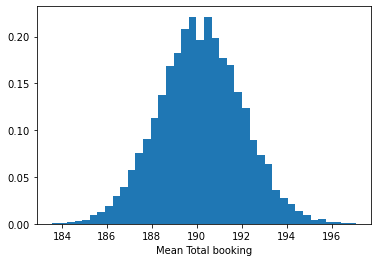

In [54]:
#Generating Replications of bootstrap data and plotting histogram

def generate_bootstrap(data, func):
    # generate bootstrap replicate
    sample_ = np.random.choice(data, len(data))
    return func(sample_)

replicates = []
for i in range(10000):
    replicate_ = generate_bootstrap(train.Total_booking, np.mean)
    replicates.append(replicate_)
    
plt.hist(replicates, bins=40, density=True)
plt.xlabel('Mean Total booking')
plt.show()

Confidence interval of bootstrap replicate: [186.51870407 193.85085266]


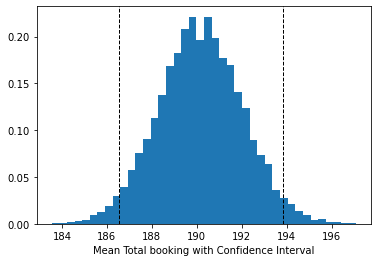

In [55]:
#Confidence Interval of Bootstrap replication

conf_int = np.percentile(replicates, [2.5, 97.5])
print("Confidence interval of bootstrap replicate:", conf_int)

# plotting bootstrap replicates with confidence interval
plt.hist(replicates, bins=40, density=True)
plt.xlabel('Mean Total booking with Confidence Interval')
plt.axvline(conf_int[0], color='k', linestyle='dashed', linewidth=1)
plt.axvline(conf_int[1], color='k', linestyle='dashed', linewidth=1)
plt.show()

In [56]:
#Ridge Regression

from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)

# fitting a model and computing the score 5 consecutive times (with different splits each time)
scores = cross_val_score(clf, X, y, cv=5)

print("Scores:",scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [0.27313467 0.30122086 0.28843901 0.28216883 0.24983314]
Accuracy: 0.28 (+/- 0.03)


In [73]:
#The Lasso
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)

# fitting a model and computing the score 5 consecutive times (with different splits each time)
scores = cross_val_score(clf, X, y, cv=5)

print("Scores:",scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores: [0.27388076 0.30090642 0.28820214 0.28204154 0.24975155]
Accuracy: 0.28 (+/- 0.03)


In [64]:
print('Mean Squared Error: %0.4f'%mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error %.4f'%np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score: %0.4f'%r2_score(y_test,y_pred))
cv_lin_model=cross_val_score(LinearRegression(),X,y,cv=10)
#Accuracy
print('Accuracy : %.4f (+/- %.3f)'%(cv_lin_model.mean(),cv_lin_model.std()*2))

Mean Squared Error: 21949.0498
Root Mean Squared Error 148.1521
R2 Score: 0.2728
Accuracy : 0.2791 (+/- 0.052)


In [59]:
from sklearn.feature_selection import RFE

model=LinearRegression()

rfe=RFE(model)
feature_selector=rfe.fit(X_train,y_train)

print('Selected Features:',X_train.columns[feature_selector.support_])
print('Feature Ranking: ',feature_selector.ranking_)

Selected Features: Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'month'], dtype='object')
Feature Ranking:  [8 1 1 1 1 1 4 2 5 7 3 6 1]


In [60]:
#reducing X to selected Features
new_X_train=feature_selector.transform(X_train)
new_X_test=feature_selector.transform(X_test)
ridge_model=Ridge()
ridge_model.fit(new_X_train,y_train)
new_ridge_pred=ridge_model.predict(new_X_test)

In [63]:
print('Mean Squared Error: %0.4f'%mean_squared_error(y_test,new_ridge_pred))
print('Root Mean Squared Error %.4f'%np.sqrt(mean_squared_error(y_test,new_ridge_pred)))
print('R2 Score: %0.4f'%r2_score(y_test,new_ridge_pred))
cv_lin_model=cross_val_score(Ridge(),X,y,cv=10)
#Accuracy
print('Accuracy : %.4f (+/- %.3f)'%(cv_lin_model.mean(),cv_lin_model.std()*2))

Mean Squared Error: 24753.6349
Root Mean Squared Error 157.3329
R2 Score: 0.1799
Accuracy : 0.2791 (+/- 0.052)


In [75]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [76]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 6093.5980


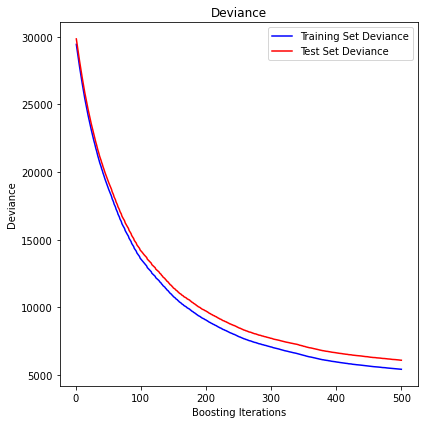

In [77]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()